In [1]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras import regularizers
import numpy as np

Using TensorFlow backend.


In [2]:
# this is our input placeholder
input_img = Input(shape=(28*28,))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(32,))

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(28*28,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(28 * 28, activation='sigmoid'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


In [4]:
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [5]:
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))

decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("x_train.shape :", x_train.shape)
print("x_test.shape :", x_test.shape)

x_train.shape : (60000, 784)
x_test.shape : (10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 123us/step - loss: 0.3302 - val_loss: 0.2616
Epoch 2/100
60000/60000 [==============================] - 5s 92us/step - loss: 0.2565 - val_loss: 0.2522
Epoch 3/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.2406 - val_loss: 0.2284
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.2225 - val_loss: 0.2132
Epoch 5/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.2090 - val_loss: 0.2019
Epoch 6/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1947 - val_loss: 0.1874
Epoch 7/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1317 - val_loss: 0.1314
Epoch 25/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1303 - val_loss: 0.1264
Epoch 26/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1291 - val_loss: 

60000/60000 [==============================] - 4s 59us/step - loss: 0.1009 - val_loss: 0.0992
Epoch 95/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1008 - val_loss: 0.0998
Epoch 96/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1007 - val_loss: 0.1003
Epoch 97/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.1004 - val_loss: 0.0999
Epoch 98/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1004 - val_loss: 0.1002
Epoch 99/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1002 - val_loss: 0.1001
Epoch 100/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1001 - val_loss: 0.0977


In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

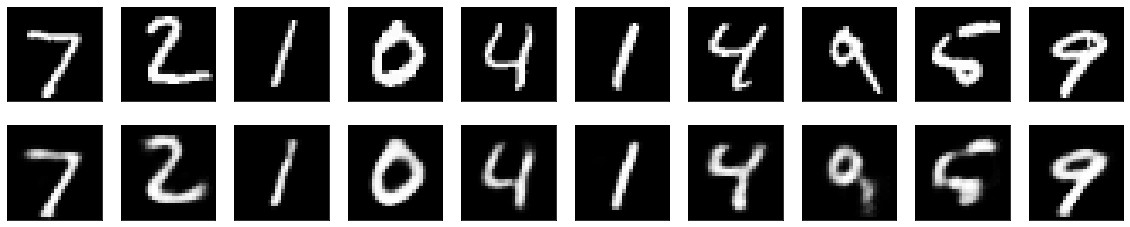

In [12]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()